## Welcome to Diabetes Prediction Project!
Here we will predict whether the patient has diabetes or not! Let's get started

In [ ]:
cd '/content'

/content


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd '/content/drive/MyDrive/Kaggle/DiabetesPrediction'

/content/drive/MyDrive/Kaggle/DiabetesPrediction


In [ ]:
ls

 diabetes.csv                                            kaggle.json
'Diabetes_Prediction_Project_withML (imbalance).ipynb'   yuklenen_diabetes.csv
 diabetes.txt


In [ ]:
pwd

'/content/drive/MyDrive/Kaggle/DiabetesPrediction'

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/DiabetesPrediction"
# /content/drive/MyDrive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
# !kaggle datasets download -d mathchi/diabetes-data-set               #for downloading dataset from kaggle

In [ ]:
#unzipping the zip files and deleting the zip files
# !unzip \diabetes-data-set.zip  && rm diabetes-data-set.zip

## About Dataset
Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)

Research Center, RMI Group Leader

Applied Physics Laboratory

The Johns Hopkins University

Johns Hopkins Road

Laurel, MD 20707

(301) 953-6231

(c) Date received: 9 May 1990

Past Usage:


Number of Instances: 768

Number of Attributes: 8 plus class

For Each Attribute: (all numeric-valued)

Number of times pregnant

Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Diastolic blood pressure (mm Hg)

Triceps skin fold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

Class variable (0 or 1)

Missing Attribute Values: Yes

Class Distribution: (class value 1 is interpreted as "tested positive for

diabetes")


For some detailed information:

1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
   Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
   the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
   on Computer Applications and Medical Care} (pp. 261--265).  IEEE
   Computer Society Press.

   The diagnostic, binary-valued variable investigated is whether the
   patient shows signs of diabetes according to World Health Organization
   criteria (i.e., if the 2 hour post-load plasma glucose was at least 
   200 mg/dl at any survey  examination or if found during routine medical
   care).   The population lives near Phoenix, Arizona, USA.

   Results: Their ADAP algorithm makes a real-valued prediction between
   0 and 1.  This was transformed into a binary decision using a cutoff of 
   0.448.  Using 576 training instances, the sensitivity and specificity
   of their algorithm was 76% on the remaining 192 instances.
Relevant Information:
  Several constraints were placed on the selection of these instances from
  a larger database.  In particular, all patients here are females at
  least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
  routine that generates and executes digital analogs of perceptron-like
  devices.  It is a unique algorithm; see the paper for details.

  Reference: https://www.kaggle.com/datasets/mathchi/diabetes-data-set


In [ ]:
#Import useful libraries
import numpy as np       #to make numpy array
import pandas as pd          #to read dataset
from sklearn.preprocessing import StandardScaler   #this will do standardization on column values according to formula
                                                   #we do this because our data is not in same measure. For our ML model it is necessary to be same.
                                                   #you can see on the picture
from sklearn.model_selection import train_test_split    #for splitting our data into train and test part
from sklearn import svm      #support vector machine. we will use it for this case. you can see on the picture.
from sklearn.metrics import accuracy_score

Visual of svm

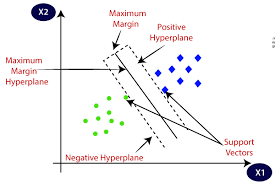


We will use only StandardScaler

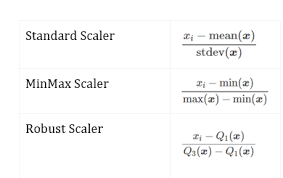

# Data Collection and Analysis
Read with pandas the PIMA Diabetes Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/DiabetesPrediction/diabetes.csv')

In [ ]:
# pd.read_csv?           #you can look at documentation 

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape       #for shape

(768, 9)

In [ ]:
df.info()       #for general information

#there are not null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T         #statistical measurements

# there are some inaccordances 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#for take true name of column
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#check for imbalance
df['Outcome'].value_counts()

#there is imbalance, we will handle during modelling part

0    500
1    268
Name: Outcome, dtype: int64

0 --> non diabetic

1 --> diabetic

In [ ]:
#look at mean based on group by. for feeling some correlation
df.groupby('Outcome').agg('mean')

# diabetic peoples measures are high, logically this is true.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Before everything separate dataframe

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Data Standardization
important because measure of all columns is not equal. ML model will see big number and will think this is more important than others. Standardization equalize importande of all columns

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)     #fitted data to our instance or object, as what you want can say

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)       #method did this proses according to formula of stancard scaler

In [ ]:
print(standardized_data)     #all values are range 0 to 1

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## Train-test splitting part

In [ ]:
# train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y ,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)        #splitted truely

(768, 8) (514, 8) (254, 8)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)        #splitted truely according to number of targets

(768,) (514,) (254,)


In [ ]:
print(len(y[y == 1]), len(y[ y == 0 ]))

268 500


In [ ]:
print(len(y_train[y_train == 1]), len(y_train[ y_train == 0 ]))

179 335


In [ ]:
print(len(y_test[y_test == 1]), len(y_test[ y_test == 0 ]))       #stratify worked truely, as you see in proportion

89 165


### Training the model

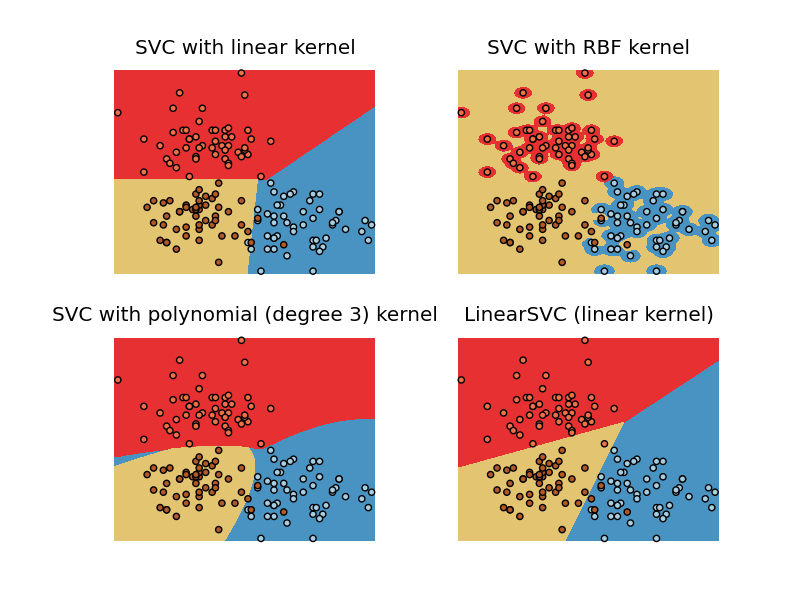

In [ ]:
#create model from support vector classifier
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the SVC machine
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Model evaluation
## Accuracy Score

In [ ]:
#we want to see train data accuracy
X_train_prediction = classifier.predict(X_train)

In [ ]:
#compare and find accuracy
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy score of the training data: {:.2f}".format(train_data_accuracy))

Accuracy score of the training data: 0.78


In [ ]:
#we want to see test data accuracy
X_test_prediction = classifier.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy score of the test data: {:.2f}".format(test_data_accuracy))

Accuracy score of the test data: 0.78


### Making Predictive System

In [ ]:
4,110,92,0,0,37.6,0.191,30,             0

(4, 110, 92, 0, 0, 37.6, 0.191, 30, 0)

In [ ]:
input_data = (4,110,92,0,0,37.6,0.191,30)       #0   - label

#changing the input data to numpy array
inp_data_as_np_arr = np.asarray(input_data)

#reshape the array, because we are predicting target for one observation
input_data_reshaped = inp_data_as_np_arr.reshape(1, -1)

#standardization the input data
standard_data = scaler.transform(input_data_reshaped)
print(standard_data)

prediction = classifier.predict(standard_data)
prediction         #True result, non diabetic

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]


array([0])

In [ ]:
input_data = (6,148,72,35,0,33.6,0.627,50)           #1 - label

#changing the input data to numpy array
inp_data_as_np_arr = np.asarray(input_data)

#reshape the array, because we are predicting target for one observation
input_data_reshaped = inp_data_as_np_arr.reshape(1, -1)

#standardization the input data
standard_data = scaler.transform(input_data_reshaped)
print(standard_data)

prediction = classifier.predict(standard_data)
prediction         #True result, diabetic

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]


array([1])

# Prediction with LogisticRegression
Handling with imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
X_train_predicted = lr.predict(X_train)
accuracy_score(X_train_prediction, y_train)

0.7801556420233463

In [ ]:
X_test_predicted = lr.predict(X_test)
accuracy_score(X_test_predicted, y_test)

0.7795275590551181

# Thanks!